In [1]:
import yt
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ds = yt.load("Data_000006")

yt : [WARNING  ] 2025-11-04 16:20:57,676 Cannot determine code units ==> Use units_override to specify the units
yt : [WARNING  ] 2025-11-04 16:20:57,677 Assuming   length unit = 1.000000 cm
yt : [WARNING  ] 2025-11-04 16:20:57,677 Assuming     time unit = 1.000000 s
yt : [WARNING  ] 2025-11-04 16:20:57,677 Assuming     mass unit = 1.000000 g
yt : [WARNING  ] 2025-11-04 16:20:57,678 Assuming magnetic unit = 3.544908 gauss
yt : [INFO     ] 2025-11-04 16:20:57,700 Parameters: current_time              = 38.7298332
yt : [INFO     ] 2025-11-04 16:20:57,700 Parameters: domain_dimensions         = [128 128  16]
yt : [INFO     ] 2025-11-04 16:20:57,701 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-11-04 16:20:57,701 Parameters: domain_right_edge         = [1.    1.    0.125]
yt : [INFO     ] 2025-11-04 16:20:57,701 Parameters: cosmological_simulation   = 0


In [3]:
axis = 0
L = 1.0
Gamma = 5./3.
beta0 = 1.0e4
rho0 = 2.0
A = 0.5
P0 = 0.6
pB = P0/beta0
B0 = np.sqrt(2.0*pB)
c_s = np.sqrt(Gamma*P0/rho0)
c = np.sqrt(P0/rho0)
v_a = B0/np.sqrt(rho0)

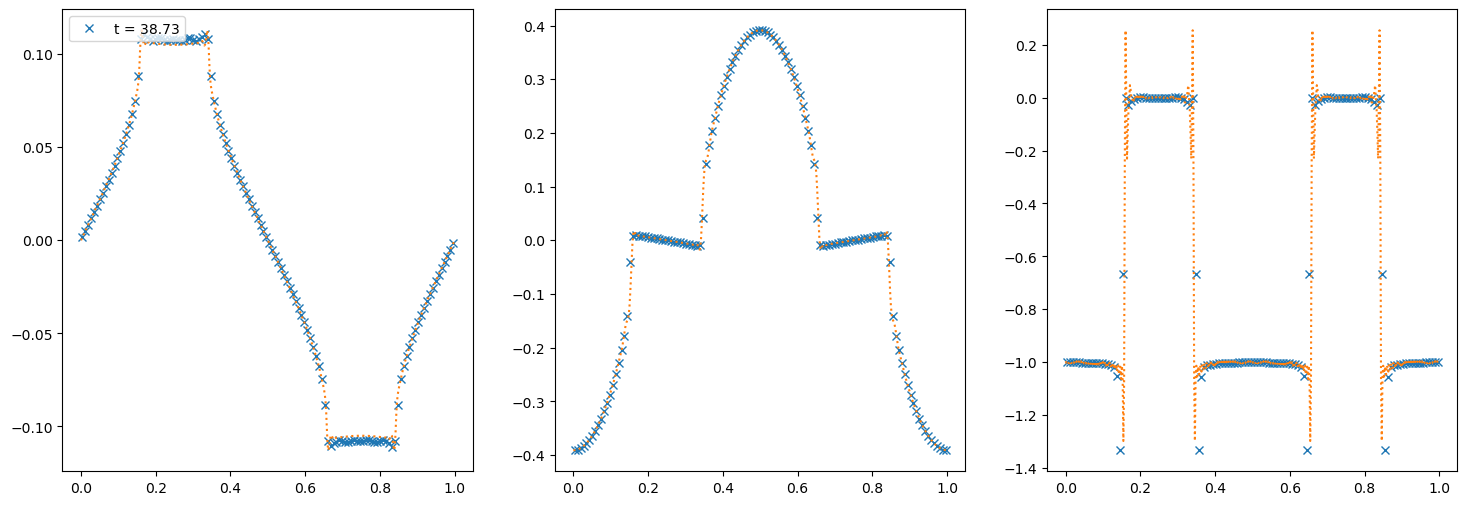

In [4]:
fig, axes = plt.subplots(figsize=(18, 6), ncols=3)
ray = ds.ortho_ray(axis, (0.5, 0.0625))
ax_name = "xyz"[axis]
r = ray[ax_name].v
v1 = (ray["gas", "velocity_y"]+ray["gas", "velocity_z"]).to_value("code_velocity")/np.sqrt(2.0)
b1 = (ray["gas", "magnetic_field_y"]+ray["gas", "magnetic_field_z"]).to_value("code_magnetic")/np.sqrt(2.0)
B = ray["gas", "magnetic_field_strength"].to_value("code_magnetic")
dp1 = ray["gamer", "DeltaP"].v
t = ds.current_time.v
axes[0].plot(r, v1/v_a, 'x', label=f"t = {t:.2f}")
axes[1].plot(r, b1/B0, 'x', label=f"t = {t:.2f}")
axes[2].plot(r, dp1/B**2, 'x')
axes[0].legend(loc=2)
d = np.load("squire-new-rk4.2998.npz")
axes[0].plot(d['z'], d['vx'], ':')
axes[1].plot(d['z'], d['Bx'], ':', label='FFT')
axes[2].plot(d['z'], d['pa']/(1 + d['Bx']**2), ':')